In [1]:
# Libraries
import matplotlib.pyplot as plt

In [2]:
# Function to read the data
def read_mfcc_data(file_path):
    mfcc_blocks = []
    current_block = []
    with open(file_path, 'r') as file:
        # Iterates over each line in the file
        for line in file:
            
            # If the current block is finished, append it to the list of blocks
            if line.strip() == '':
                if current_block:
                    mfcc_blocks.append(current_block)
                    current_block = []
            else:
                # Convert each line to a list of floats (MFCC coefficients)
                frame = list(map(float, line.strip().split()))
                current_block.append(frame)
        # Append the last block if it ends without a blank line
        if current_block:
            mfcc_blocks.append(current_block)
    return mfcc_blocks

In [18]:
# Function to plot the MFCCs
# Function takes the mfcc blocks and the indices at which each digit starts
def plot_mfccs_for_digits(mfcc_blocks, digit_start_indices, num_digits=10):
    # Define the grid shape (number of rows and columns)
    rows, cols = 5, 3  # Adjust this based on your needs
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 10))
    axes = axes.flatten()  # Flatten the axes array for easier indexing
    
    # Iterates through each digit
    for i in range(len(axes)):
        if i < num_digits:  # Plot only for available digits
            # Gets the first utterance for each of the digits
            block = mfcc_blocks[digit_start_indices[i]]
            
            # Extracting the first three MFCCs for each frame in the block
            mfcc1 = [frame[0] for frame in block]
            mfcc2 = [frame[1] for frame in block]
            mfcc3 = [frame[2] for frame in block]
            
            # Plots the MFCCs
            axes[i].plot(mfcc1, label='MFCC 1')
            axes[i].plot(mfcc2, label='MFCC 2')
            axes[i].plot(mfcc3, label='MFCC 3')
            axes[i].set_title(f'Digit {i}')
            axes[i].legend()
            axes[i].set_xlabel('Frame')
            axes[i].set_ylabel('Coefficient Value')
        else:
            # Hide unused subplots
            axes[i].axis('off')
    
    # Adjust layout to prevent overlapping
    plt.tight_layout()
    plt.show()

In [19]:
# Reads the data
file_path = './data/Train_Arabic_Digit.txt'
mfcc_blocks = read_mfcc_data(file_path)

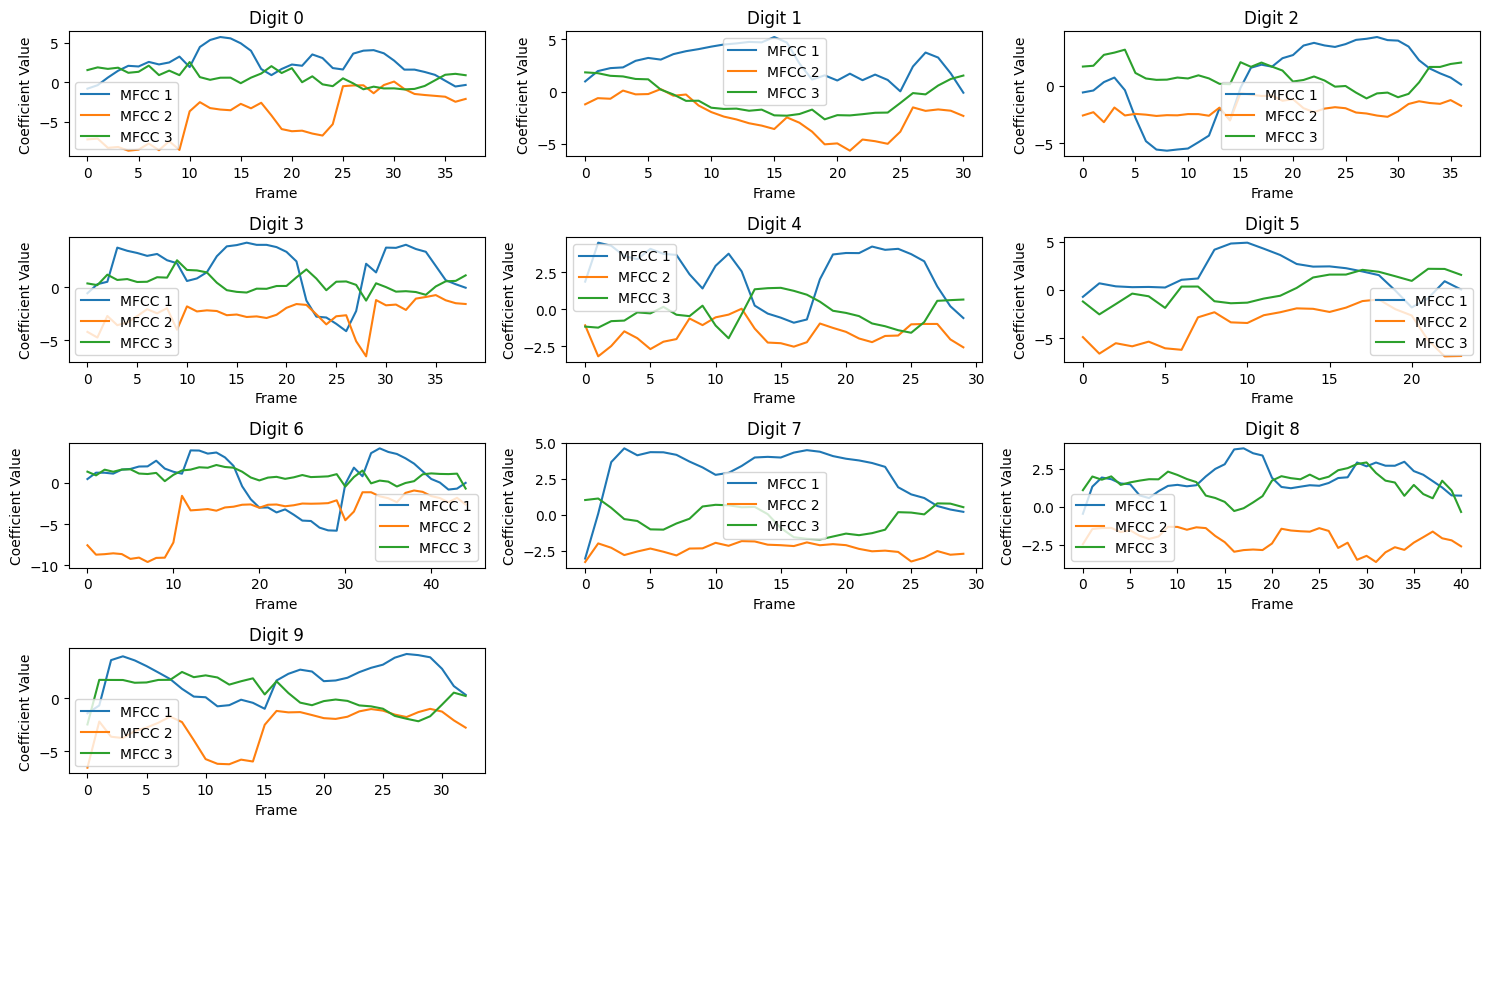

In [20]:
# Plot the data
# Get the indices at which each digit starts
digit_start_indices = [0, 661, 1321, 1981, 2641, 3301, 3961, 4621, 5281, 5941]
plot_mfccs_for_digits(mfcc_blocks, digit_start_indices)

In [31]:
# Scatter plots
def plot_mfcc_scatter_for_digits(mfcc_blocks, digit_start_indices, num_digits=10):
    # Subplots for each of the digits
    fig, axes = plt.subplots(nrows=num_digits, ncols=3, figsize=(15, 30))

    # Iterates through each digit
    for i in range(num_digits):
        # Gets the first utterance for each of the digits
        block = mfcc_blocks[digit_start_indices[i]]
        
        # Gets the first three MFCCs for each frame in the block
        mfcc1 = [frame[0] for frame in block]
        mfcc2 = [frame[1] for frame in block]
        mfcc3 = [frame[2] for frame in block]

        # Define the axis for each of the subplots
        axes[i, 0].scatter(mfcc1, mfcc2, c='blue', label='MFCC1 vs MFCC2')
        axes[i, 1].scatter(mfcc1, mfcc3, c='red', label='MFCC1 vs MFCC3')
        axes[i, 2].scatter(mfcc2, mfcc3, c='green', label='MFCC2 vs MFCC3')

        # Plot each of the subplots
        for j in range(3):
            axes[i, j].legend()
            axes[i, j].set_xlabel('MFCC {}'.format(1 + j // 2))
            axes[i, j].set_ylabel('MFCC {}'.format(2 + j % 2))
            axes[i, j].set_title(f'Digit {i} Scatter Plot')

    plt.tight_layout()
    plt.show()

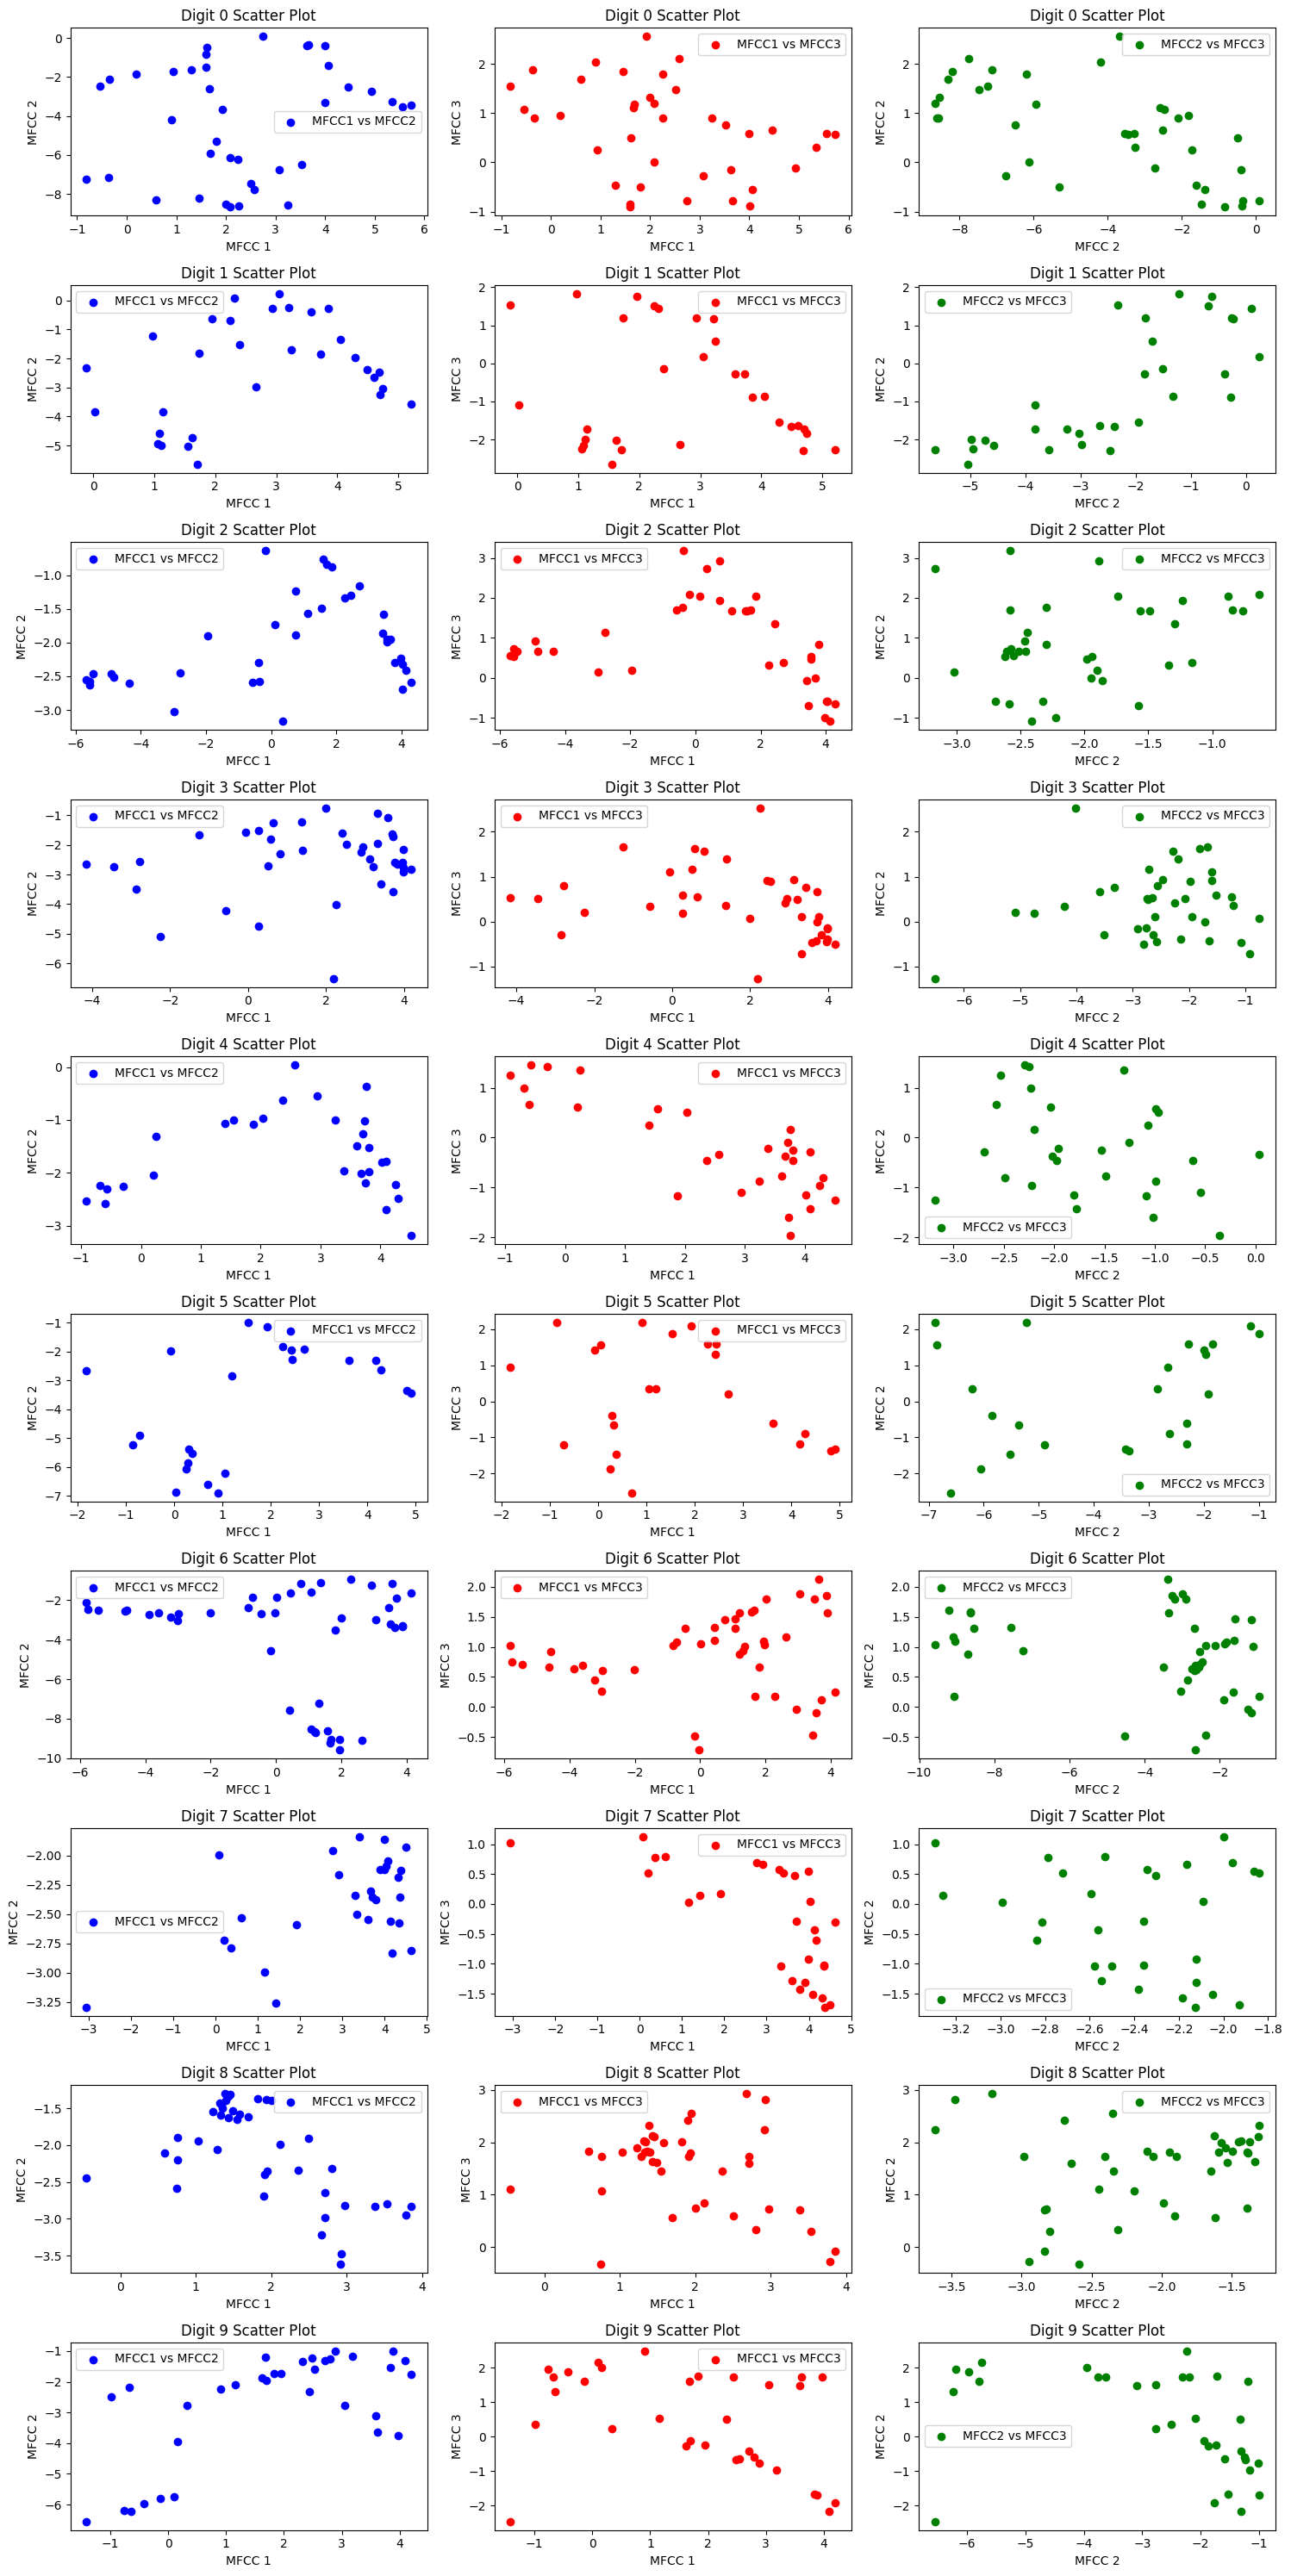

In [32]:
plot_mfcc_scatter_for_digits(mfcc_blocks, digit_start_indices)